# Lead Scoring Case Study

### Submitted By - Sakshi Manchalwar & Shreepriya Dogra

## Problem Statement

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## 0. Importing Libraries and Checking the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
pd.set_option('display.max_columns',37)

In [2]:
#Loading the csv data
lead = pd.read_csv('Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
lead = pd.read_csv('Leads.csv')
lead.tail()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Email Marked Spam,Saudi Arabia,IT Projects Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,High in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,15.0,17.0,No,No,Email Marked Spam
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,India,Media and Advertising,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,wrong number given,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,19.0,No,Yes,SMS Sent
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,India,Business Administration,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,invalid number,Not Sure,No,No,Potential Lead,Mumbai,02.Medium,01.High,13.0,20.0,No,Yes,SMS Sent
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,India,Human Resource Management,Online Search,NaN,NaN,No,No,No,No,No,No,No,No,NaN,NaN,No,No,NaN,Other Metro Cities,02.Medium,02.Medium,15.0,16.0,No,No,SMS Sent
9239,571b5c8e-a5b2-4d57-8574-f2ffb06fdeff,579533,Landing Page Submission,Direct Traffic,No,No,1,6.0,1279,3.00,SMS Sent,Bangladesh,Supply Chain Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Other Cities,02.Medium,01.High,15.0,18.0,No,Yes,Modified


In [4]:
#Checking the dimensions of the dataframe
lead.shape

(9240, 37)

In [5]:
#Checking the data types and null counts of columns
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
# check for duplicate
lead[lead.duplicated(keep = False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


### 1 Missing Value Treatment

In [7]:
#Finding the percentage of missing values of each column
lead_missing_Per = round(100*lead.isnull().sum()/len(lead),2)
lead_missing_Per 

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
# Deleting the columns 'Prospect ID' as there is no effect of these colums on model prediction
lead = lead.drop('Prospect ID', axis=1)
lead = lead.drop('Lead Number', axis=1)

In [9]:
#Finding the count of values from each type of Lead Source and which source gives most leads
lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
WeLearn                 1
blog                    1
youtubechannel          1
NC_EDM                  1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [10]:
#Saving the highest lead generating source into the variable - lead_mode
lead_mode = lead['Lead Source'].mode()[0]

In [11]:
#Filling the missing values in the Lead Source column with the lead_mode variable calculated above
lead['Lead Source'] = lead['Lead Source'].fillna('lead_mode')
lead['Lead Source'].isnull().sum()

0

In [12]:
#Finding the median of the Total Visits - The total number of visits made by the customer on the website.
lead['TotalVisits'].median()

3.0

In [13]:
#Filling in the missing values in the Total Visits column with the median value of the Total Visits column
lead['TotalVisits'] = lead['TotalVisits'].fillna(lead['TotalVisits'].median())
lead['TotalVisits'].isnull().sum()

0

In [14]:
#Finding the mean of Page Views Per Visit column 
lead['Page Views Per Visit'].mean()

2.3628199494672093

In [15]:
#Filling in the missing values in the Page Views Per Visit column with the mean value of the Page Views Per Visit column
lead['Page Views Per Visit'] = lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].mean())
lead['Page Views Per Visit'].isnull().sum()

0

In [16]:
#Finding the mode(most common) value of Last activity performed by the customer
lead['Last Activity'].mode()

0    Email Opened
dtype: object

In [17]:
#Filling in the missing values in the Lead Activity column with the mode value of Lead Activity column
lead['Last Activity'] = lead['Last Activity'].fillna('Email Opened')
lead['Last Activity'].isnull().sum()

0

In [18]:
#Finding out the value India in the Country Data vs other values
(lead['Country']!='India').value_counts()

False    6492
True     2748
Name: Country, dtype: int64

####  There are more leads from India and thus replacing nan with India

In [19]:
#Filling in the missing values in the Country column with the value India, as it has the largest value
lead['Country'] = lead['Country'].fillna('India')
lead['Country'].isnull().sum()

0

In [20]:
#Observing the count of data items in the Specialization column - The industry domain in which the customer worked before.
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
#Filling in the missing values in the Specialization column with the value 'Select' - This value is equivalent to a Null selection
lead['Specialization'] = lead['Specialization'].fillna('Select')
lead['Specialization'].isnull().sum()

0

In [22]:
#Observing the count of data items in the How did you hear about X Education column 
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [23]:
#Filling in the missing values in the How did you hear about X Education column with the value 'Select' - This value is equivalent to a Null selection
lead['How did you hear about X Education'] = lead['How did you hear about X Education'].fillna('Select')
lead['How did you hear about X Education'].isnull().sum()

0

In [24]:
#Observing the count of data items in the What is your current occupation column 
lead['What is your current occupation'].value_counts() 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [25]:
#Filling in the missing values in the What is your current occupation column with the value 'Not Provided' - This value is equivalent to a Null selection
lead['What is your current occupation'] = lead['What is your current occupation'].fillna('Not Provided')
lead['What is your current occupation'].isnull().sum()

0

In [26]:
##Observing the count of data items in the What matters most to you in choosing a course column 
lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

#####  Since column has maximum values for Better Career Prospects and other are 3 only so, decided to drop the column

In [27]:
#Dropping the What matters most to you in choosing a course column
lead = lead.drop(['What matters most to you in choosing a course'],1)

In [28]:
#Checking the most frequent value in the Tags column - Tags assigned to customers indicating the current status of the lead.
lead['Tags'].mode()

0    Will revert after reading the email
dtype: object

In [29]:
#Filling in the missing values in the Tags column with the value 'Will revert after reading the email' 
lead['Tags'] = lead['Tags'].fillna('Will revert after reading the email')

In [30]:
# dropping the following columns that have more than 30% null values
lead = lead.drop('Lead Quality', axis=1)
lead = lead.drop('Lead Profile', axis=1)
lead = lead.drop('City', axis=1)
lead = lead.drop('Asymmetrique Profile Index', axis=1)
lead = lead.drop('Asymmetrique Activity Index', axis=1)
lead = lead.drop('Asymmetrique Activity Score', axis=1)
lead = lead.drop('Asymmetrique Profile Score', axis=1)

In [31]:
# Checking Nuull values
lead.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Country                                     0
Specialization                              0
How did you hear about X Education          0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                              

#### Note - All coulumns that we will use for our analysis do not have any Null values.

### 2 Outlier Treatment

In [32]:
#Understanding the numerical columns and looking at the various percentiles of the data in each 
lead.describe(percentiles = [.25,.5,.75,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.362820
std,0.486714,4.819024,548.021466,2.145333
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
99%,1.000000,17.000000,1840.610000,9.000000
max,1.000000,251.000000,2272.000000,55.000000


In [33]:
#Leaving the target column - Converted - saving all the other columns in a variable called feature for our further analysis
feature = lead.columns[5:8]
for i in enumerate(feature):
    print(i)

(0, 'TotalVisits')
(1, 'Total Time Spent on Website')
(2, 'Page Views Per Visit')


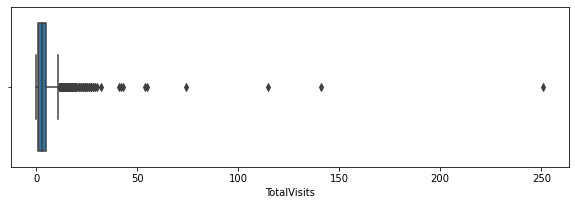

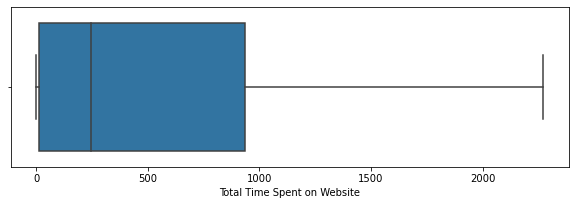

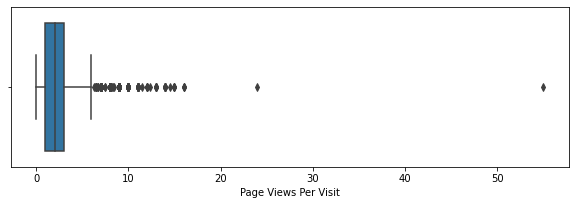

In [34]:
#Looking at the boxplots of the numerical columns 
feature = lead.columns[5:8]
for i in enumerate(feature):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(lead[i[1]])

#### Note - From the above, it can be seen that outlier exists in the columns TotalVisits and Page Views Per Visit columns.

In [35]:
#Removing the rows where the Total Visits are more than 17
lead = lead[(lead.TotalVisits <= 17) ]

#Removing the rows where the Page Views Per Visit are more than 9
lead = lead[(lead['Page Views Per Visit'] <= 9)]

In [36]:
#Looking the percentiles of the numerical columns
lead.describe(percentiles = [.25,.5,.75,.95,.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9090.000000,9090.000000,9090.000000,9090.000000
mean,0.384488,3.140924,484.243784,2.268304
std,0.486501,2.881884,547.243973,1.880919
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,4.000000,930.000000,3.000000
95%,1.000000,9.000000,1558.000000,6.000000
99%,1.000000,13.000000,1840.110000,8.000000
max,1.000000,17.000000,2272.000000,9.000000


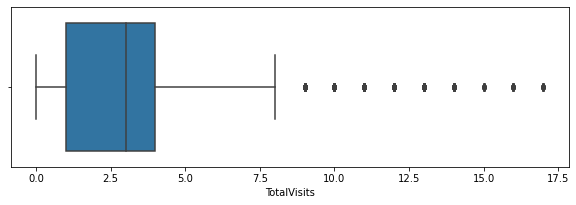

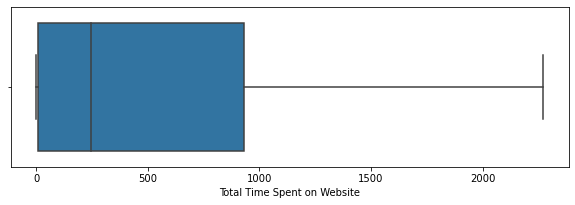

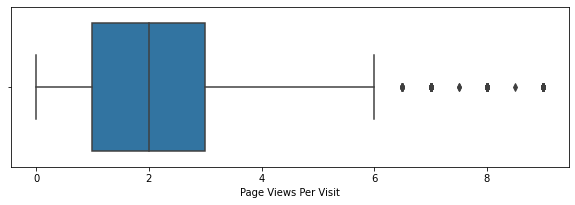

In [37]:
#Making boxplots for the numerical feature columns
feature = lead.columns[5:8]
for i in enumerate(feature):
    plt.figure(figsize = (10,10))
    plt.subplot(3,1, i[0]+1)
    sns.boxplot(lead[i[1]])

In [38]:
# Determine the percentage of data retained

num_data = round(100*(len(lead)/9240),2)
print(num_data)

98.38


#### Note - After cleaning data 98% data has been retained.

In [39]:
#Finding the final dimensions of the dataframe
lead.shape

(9090, 27)

# 3 EDA

## 3.1 Univariate Analysis

In [40]:
#Looking at the data types of the columns of the dataframe
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9090 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9090 non-null   object 
 1   Lead Source                               9090 non-null   object 
 2   Do Not Email                              9090 non-null   object 
 3   Do Not Call                               9090 non-null   object 
 4   Converted                                 9090 non-null   int64  
 5   TotalVisits                               9090 non-null   float64
 6   Total Time Spent on Website               9090 non-null   int64  
 7   Page Views Per Visit                      9090 non-null   float64
 8   Last Activity                             9090 non-null   object 
 9   Country                                   9090 non-null   object 
 10  Specialization                      

In [41]:
#Creating a new dataframe lead1 in which the data is grouped by the target varibale - Converted 
lead1 = lead.groupby('Converted').count()
lead1.reset_index()

,Converted,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595,5595
1,1,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495,3495


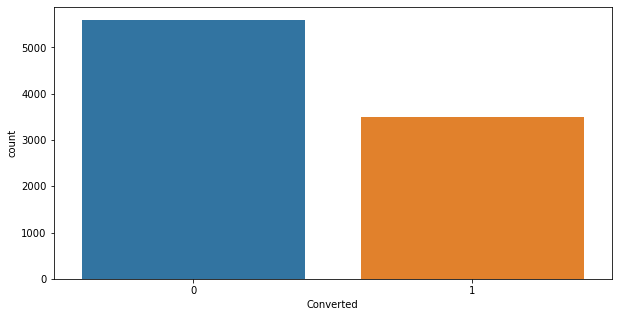

In [42]:
#Making a countplot of the target column - Converted 
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x= "Converted", data=lead)
plt.show()

**Note - We can clearly conclude that most of leads are not successfuly converted.**

## 3.2 Bivariate Analysis

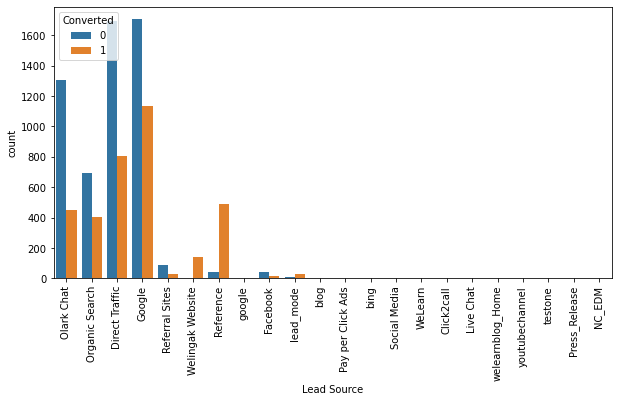

In [43]:
#Plotting the Converted variable against the Lead Source to determine which Sources contribute most to the Converted leads
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x="Lead Source", hue="Converted", data=lead,orient='h' )
plt.xticks(rotation = 90)
plt.show()

**Note - The leads from Direct Traffic and Google have more successful conversion. The lead conversion is better in Google leads. Lead conversion through References shows a different trend - The proportion of leads that get converted from the References source is much much higher than other categories.**

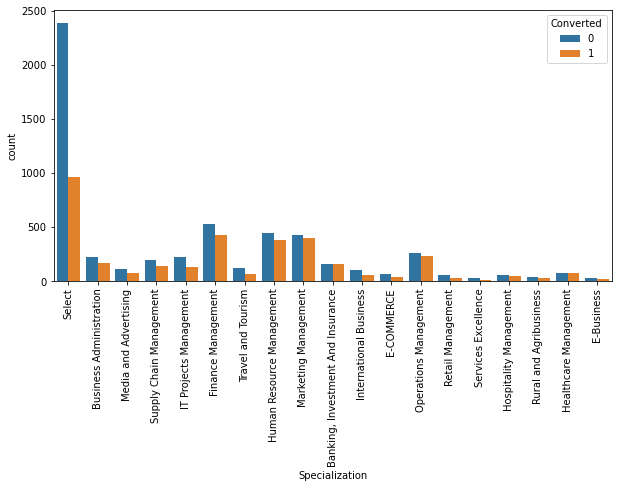

In [44]:
#Plotting the Converted variable against the Specialization to determine leads from which previous Specialization contribute most to the Converted leads
plt.subplots(figsize = (10,5))
sns.countplot(lead.Specialization,hue = lead.Converted)
plt.xticks(rotation = 90)
plt.show()

**Note - Many leads have not their specified Specialization, and from the ones who have speified Finance Management can be seen as a good specialization which leads to conversion.**

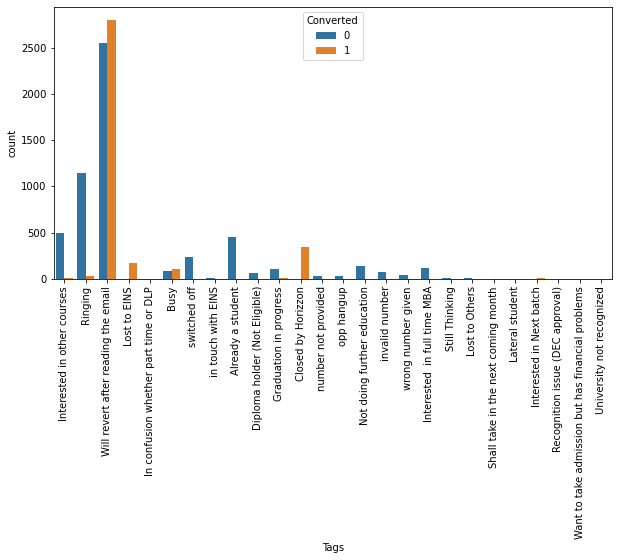

In [45]:
#Plotting the Converted variable against the Tags to determine the current state of the lead and the conversion variable
plt.subplots(figsize = (10,5))
sns.countplot(lead['Tags'] ,hue = lead.Converted)
plt.xticks(rotation = 90)
plt.show()

**Most of the lead have their Email opened as their last activity.Conversion rate for leads with last activity as SMS Sent is good**

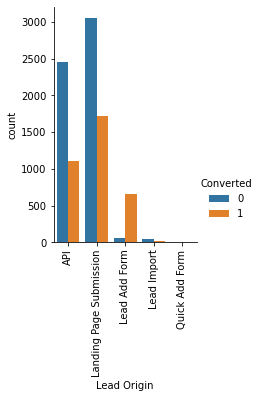

In [46]:
#Plotting the Converted variable against the Lead Origin to determine the relationship between the two variables
sns.catplot(x="Lead Origin", hue="Converted",data=lead, kind="count",height=4, aspect=.7)
plt.xticks(rotation = 90)
plt.show()

**Note - Customers from the Landing Page Submission have good response & conversion rate.**

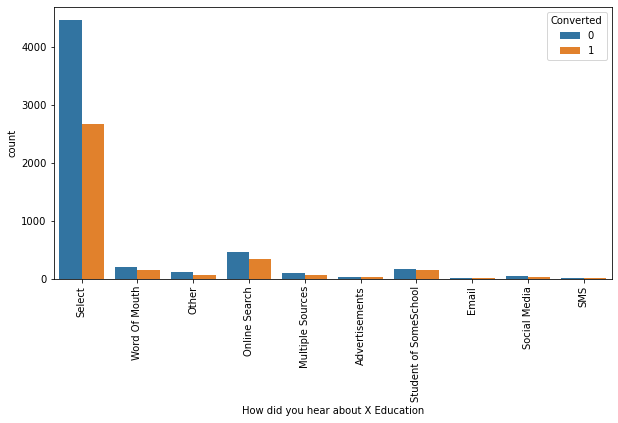

In [47]:
plt.subplots(figsize = (10,5))
sns.countplot('How did you hear about X Education',hue="Converted", data = lead)
plt.xticks(rotation = 90)
plt.show()

**Note - Most of leads have not mentioned anything in how did they hear about X Education and many reached the website through an online search.**

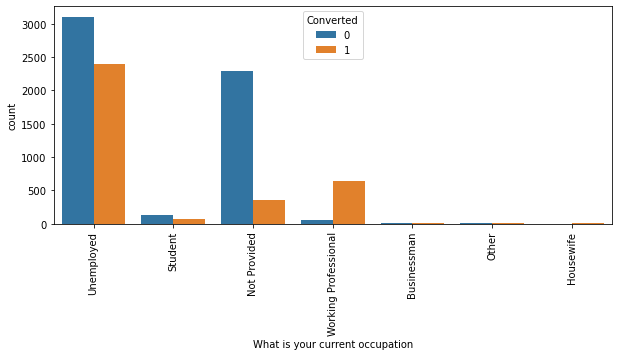

In [48]:
#Plotting the Converted variable against the How did you hear about X Education to determine the relationship between the two variables
plt.subplots(figsize = (10,4))
sns.countplot('What is your current occupation' ,hue="Converted",data=lead)
plt.xticks(rotation = 90)
plt.show()

**Note - Most of the lead are being converted from the Unemployed category and converted leads are also good from the working professional category in terms of the proportion. The businessman are very bad leads in conversion.**

**Trying to understand some variables and their relationship with converted = 1**

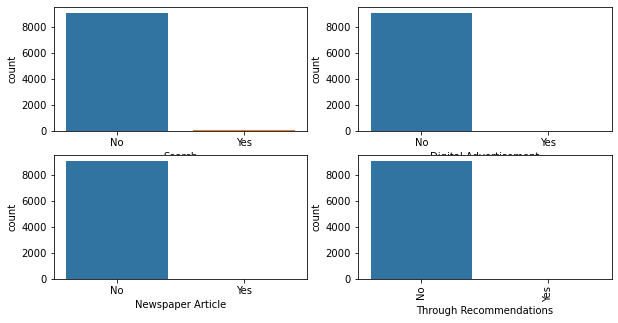

In [49]:
#Plotting countplots of these variables
plt.subplots(figsize = (10,5))
plt.subplot(2,2,1)
sns.countplot('Search' ,data = lead)

plt.subplot(2,2,2)
sns.countplot('Digital Advertisement' ,data = lead)

plt.subplot(2,2,3)
sns.countplot('Newspaper Article' ,data = lead)

plt.subplot(2,2,4)
sns.countplot('Through Recommendations' ,data = lead)

plt.xticks(rotation = 90)
plt.show()


**Note - Customers are not getting converted based on the Search, Digital Advertisement, Newspaper Article, or Through Recommendations. The number of leads that are converted are negligible.**

**Checking some more variables.**

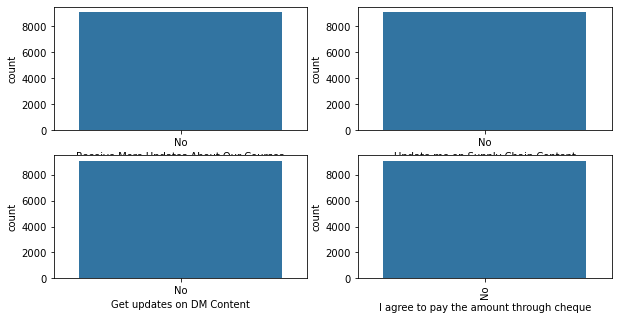

In [50]:
#Plotting countplots of these variables
plt.subplots(figsize = (10,5))
plt.subplot(2,2,1)
sns.countplot('Receive More Updates About Our Courses' ,data = lead)

plt.subplot(2,2,2)
sns.countplot('Update me on Supply Chain Content' ,data = lead)

plt.subplot(2,2,3)
sns.countplot('Get updates on DM Content' ,data = lead)

plt.subplot(2,2,4)
sns.countplot('I agree to pay the amount through cheque' ,data = lead)

plt.xticks(rotation = 90)
plt.show()


**Note - Customers are not getting converted based on the above parameters. The number of leads that are converted are 0.**

**Checking some more variables.**

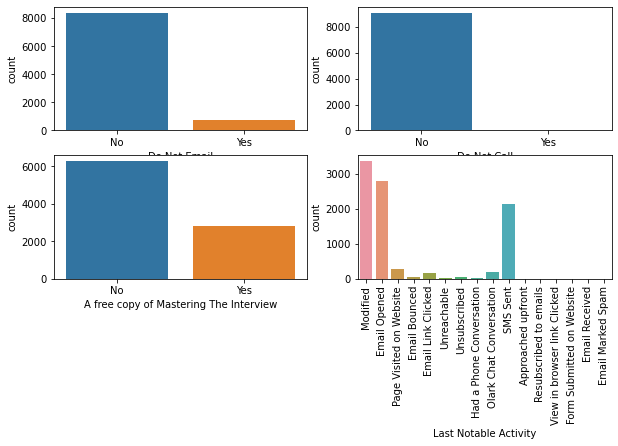

In [51]:
#Plotting countplots of these variables
plt.subplots(figsize = (10,5))
plt.subplot(2,2,1)
sns.countplot('Do Not Email' ,data = lead)

plt.subplot(2,2,2)
sns.countplot('Do Not Call' ,data = lead)

plt.subplot(2,2,3)
sns.countplot('A free copy of Mastering The Interview' ,data = lead)

plt.subplot(2,2,4)
sns.countplot('Last Notable Activity' ,data = lead)

plt.xticks(rotation = 90)
plt.show()

**Note - The relationship of the variables with the target variable can be seen here.**

## 3.3 Multivariate Analysis

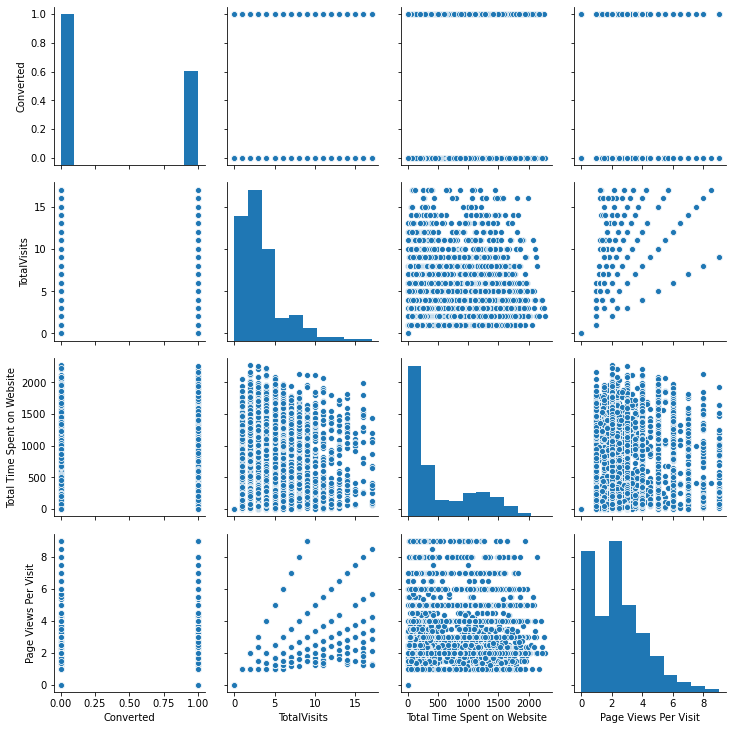

In [52]:
#Creating a pairplot to understand the correlation between the numerical variables
sns.pairplot(lead)
plt.show()

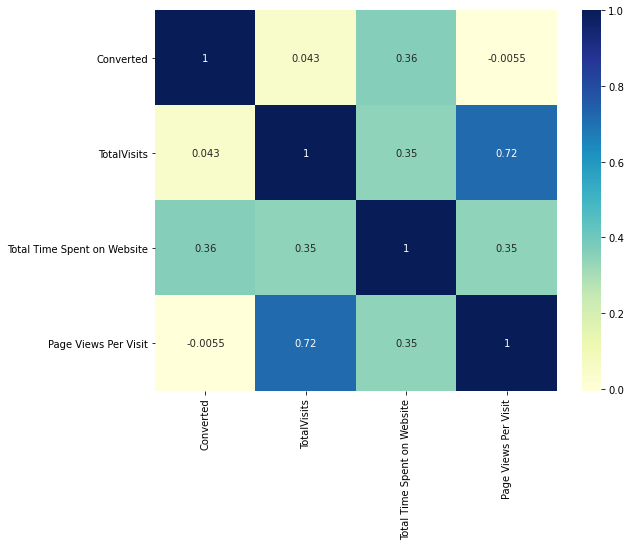

In [53]:
#Creating a heatmap to understand the corelation.
plt.figure(figsize = (9,7)) 
sns.heatmap(lead.corr(),annot = True,cmap="YlGnBu")
plt.show()

**Note - Total Visits and Page Views Per Visit has a strong correlation.**

## 4. Data Preparation

**Based on the EDA analysis it is seen that many columns are not adding any information to the model, hence we can drop them before further analysis.**

In [54]:
#Checking the head of the dataframe
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [55]:
#Reading the column headings in the dataframe
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [56]:
#Dropping the columns that do not have any impact on the Converted target variable
lead = lead.drop(['Do Not Email', 'Do Not Call','Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations','Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content','Tags',
       'I agree to pay the amount through cheque'],axis = 1)

In [57]:
#Checking the head of the dataframe
lead.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,No,Modified


In [58]:
#Checking the shape of the dataframe
lead.shape

(9090, 13)

In [59]:
#Reading the column headings in the dataframe
lead.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [60]:
#Making dummies
dummy1 = pd.get_dummies(lead[['Lead Origin', 'Lead Source', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead1 = pd.concat([lead, dummy1], axis=1)

In [61]:
#Dropping the original variable after the dummies have been created
lead1 = lead1.drop(['Lead Origin', 'Lead Source', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis = 1)

In [62]:
#Checking the head of updated dataframe
lead1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


##  5. Train Test Split

In [63]:
#Removing the target variable from lead1 and saving it to new dataframe X, for the modeling
X = lead1.drop(['Converted'],axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [64]:
#Saving the target variable into a new dataframe Y
Y = lead1['Converted']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [65]:
#Splitting the dataframes X and Y into train and test
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [66]:
#Checking the head of the X_train dataframe
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4083,2.0,335,2.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7309,3.0,39,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7613,3.0,176,3.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8659,12.0,25,6.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8829,1.0,49,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [67]:
#Checking the head of the Y_train dataframe
Y_train.head()

4083    0
7309    0
7613    0
8659    0
8829    0
Name: Converted, dtype: int64

In [68]:
#Checking the head of the X_test dataframe
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3343,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2600,3.0,140,3.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3115,7.0,402,7.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1348,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4525,4.0,1701,4.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


##  6. Feature Scaling

In [69]:
#Importing StandardScalar to scale the selected features
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()

In [70]:
#Sacling the chosen features
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = Scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [71]:
#Checking the head of the X_train dataframe
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,...,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
4083,-0.395780,-0.270045,-0.138342,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7309,-0.050061,-0.810009,0.393850,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7613,-0.050061,-0.560093,0.393850,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8659,3.061411,-0.835548,1.990424,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8829,-0.741499,-0.791767,-0.670533,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [72]:
#checking converted rate
converted_Rate = (sum(lead1['Converted'])/len(lead1['Converted']))*100
converted_Rate

38.448844884488445

**The percentage of leads that are Converted successfully in the lead1 dataframe - Converted rate is 38% only.**

In [73]:
#Using the GLM function on X_train and Y_train
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())

In [74]:
#Checking the summary of the GLM Regression
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7147
Model Family:                Binomial   Df Model:                          124
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Thu, 29 Oct 2020   Deviance:                          nan
Time:                        18:50:12   Pearson chi2:                 9.19e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                    -1.251e+15   8.68e+07  -1.44e+07      0.000   -1.25e+15   -1.25e+15
TotalVisits                                               5.045e+13   1.25e+06   4.02e+07      0.000    5.04e+13    5.04e+13
Total Time Spent on Website                               3.846e+14   9.01e+05   4.27e+08      0.000    3.85e+14    3.85e+14
Page Views Per Visit                                      -1.13e+14   1.31e+06   -8.6e+07      0.000   -1.13e+14   -1.13e+14
Lead Origin_Landing Page Submission                      -1.405e+14    3.7e+06  -3.79e+07      0.000    -1.4e+14    -1.4e+14
Lead Origin_Lead Add Form                                  7.05e+14   3.38e+07   2.08e+07      0.000    7.05e+14    7.05e+14
Lead Origin_Lead Import                                   4.633e+15   7.06e+07   6.56e+07      0.000    4.63e+15    4.63e+15
Lead Origin_Quick Add Form                                5.082e+15   7.69e+07   6.61e+07      0.000    5.08e+15    5.08e+15
Lead Source_Direct Traffic                                1.289e+15   5.16e+07    2.5e+07      0.000    1.29e+15    1.29e+15
Lead Source_Facebook                                      -3.44e+15   8.68e+07  -3.96e+07      0.000   -3.44e+15   -3.44e+15
Lead Source_Google                                        1.327e+15   5.15e+07   2.57e+07      0.000    1.33e+15    1.33e+15
Lead Source_Live Chat                                     4.308e+15   6.15e+07   7.01e+07      0.000    4.31e+15    4.31e+15
Lead Source_NC_EDM                                        5.372e+15   8.52e+07    6.3e+07      0.000    5.37e+15    5.37e+15
Lead Source_Olark Chat                                    1.833e+15   5.16e+07   3.55e+07      0.000    1.83e+15    1.83e+15
Lead Source_Organic Search                                1.356e+15   5.16e+07   2.63e+07      0.000    1.36e+15    1.36e+15
Lead Source_Pay per Click Ads                            -3.052e+15   8.48e+07   -3.6e+07      0.000   -3.05e+15   -3.05e+15
Lead Source_Press_Release                                -2.745e+15    8.5e+07  -3.23e+07      0.000   -2.74e+15   -2.74e+15
Lead Source_Reference                                     9.597e+14   3.91e+07   2.46e+07      0.000     9.6e+14     9.6e+14
Lead Source_Referral Sites                                1.415e+15    5.2e+07   2.72e+07      0.000    1.42e+15    1.42e+15
Lead Source_Social Media                                   1.72e+15   7.03e+07   2.45e+07      0.000    1.72e+15    1.72e+15
Lead Source_WeLearn                                      -6.994e+07      2.276  -3.07e+07      0.000   -6.99e+07   -6.99e+07
Lead Source_Welingak Website                              1.061e+15   3.95e+07   2.

###  7. Feature Selection Using RFE

In [75]:
#Using the Logistic Regression function
logreg = LogisticRegression()

In [76]:
#Importing RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 18)            
rfe = rfe.fit(X_train, Y_train)

In [77]:
#Checking the rfe.support_ array
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True,

In [78]:
#Printing all the features after the RFE
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 41),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 48),
 ('Lead Origin_Quick Add Form', False, 73),
 ('Lead Source_Direct Traffic', False, 13),
 ('Lead Source_Facebook', False, 14),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 46),
 ('Lead Source_NC_EDM', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 55),
 ('Lead Source_Press_Release', False, 80),
 ('Lead Source_Reference', False, 26),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 34),
 ('Lead Source_WeLearn', False, 113),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 108),
 ('Lead Source_blog', False, 58),
 ('Lead Source_google', False, 66),
 ('Lead Source_lead_mode', False, 39)

In [79]:
#Printing the columns not selected
X_train.columns[~ rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       ...
       'Last Notable Activity_Email Marked Spam',
       'Last Notable Activity_Email Opened',
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=112)

In [80]:
#Saving the selected feature list in the col variable
col = X_train.columns[rfe.support_]

In [81]:
#Printing the selected feature list in saved in the col variable
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Resubscribed to emails', 'Country_Italy',
       'Country_Nigeria', 'Country_Saudi Arabia', 'Specialization_Select',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [82]:
#Checking the model details
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial()) 
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7253
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2947.1
Date:                Thu, 29 Oct 2020   Deviance:                       5894.3
Time:                        18:50:26   Pearson chi2:                 7.22e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3322      0.116     -2.863      0.004      -0.560      -0.105
Total Time Spent on Website                              1.0972      0.038     29.041      0.000       1.023       1.171
Lead Origin_Landing Page Submission                     -0.9160      0.120     -7.644      0.000      -1.151      -0.681
Lead Origin_Lead Add Form                                2.8327      0.191     14.861      0.000       2.459       3.206
Lead Source_Olark Chat                                   1.1717      0.115     10.154      0.000       0.946       1.398
Lead Source_Welingak Website                             2.7910      0.742      3.759      0.000       1.336       4.246
Last Activity_Email Bounced                             -1.8238      0.283     -6.450      0.000      -2.378      -1.270
Last Activity_Olark Chat Conversation                   -1.3659      0.158     -8.655      0.000      -1.675      -1.057
Last Activity_Resubscribed to emails                    25.6414   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Country_Italy                                          -24.9461   4.25e+04     -0.001      1.000   -8.33e+04    8.33e+04
Country_Nigeria                                        -23.1136    3.3e+04     -0.001      0.999   -6.46e+04    6.46e+04
Country_Saudi Arabia                                    -1.9185      0.870     -2.206      0.027      -3.623      -0.214
Specialization_Select                                   -0.8351      0.114     -7.296      0.000      -1.059      -0.611
What is your current occupation_Housewife               23.8687   2.49e+04      0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Not Provided            -1.1129      0.084    -13.233      0.000      -1.278      -0.948
What is your current occupation_Working Professional     2.2010      0.169     13.013      0.000       1.869       2.532
Last Notable Activity_Had a Phone Conversation           2.8709      1.200      2.393      0.017       0.520       5.222
Last Notable Activity_SMS Sent                           1.4924      0.075     19.983      0.000       1.346       1.639
Last Notable Activity_Unreachable                        1.9077      0.527      3.619      0.000       0.875       2.941
========================================================================================================================
"""

**Note - Some variables are having p value more than 0.05 thus dropping them one by one.**

In [83]:
#Dropping Tags_Interested in Next batch
col = col.drop('Last Activity_Resubscribed to emails')
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Country_Italy',
       'Country_Nigeria', 'Country_Saudi Arabia', 'Specialization_Select',
       'What is your current occupation_Housewife',
       'What is your current occupation_Not Provided',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [84]:
#Checking the model details
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial()) 
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7254
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2949.3
Date:                Thu, 29 Oct 2020   Deviance:                       5898.7
Time:                        18:50:26   Pearson chi2:                 7.22e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3337      0.116     -2.876      0.004      -0.561      -0.106
Total Time Spent on Website                              1.0969      0.038     29.039      0.000       1.023       1.171
Lead Origin_Landing Page Submission                     -0.9146      0.120     -7.634      0.000      -1.149      -0.680
Lead Origin_Lead Add Form                                2.8335      0.191     14.866      0.000       2.460       3.207
Lead Source_Olark Chat                                   1.1765      0.115     10.201      0.000       0.950       1.402
Lead Source_Welingak Website                             2.7904      0.742      3.758      0.000       1.335       4.246
Last Activity_Email Bounced                             -1.8251      0.283     -6.456      0.000      -2.379      -1.271
Last Activity_Olark Chat Conversation                   -1.3700      0.158     -8.685      0.000      -1.679      -1.061
Country_Italy                                          -24.9443   4.25e+04     -0.001      1.000   -8.33e+04    8.33e+04
Country_Nigeria                                        -23.1126    3.3e+04     -0.001      0.999   -6.47e+04    6.46e+04
Country_Saudi Arabia                                    -1.9192      0.870     -2.206      0.027      -3.624      -0.214
Specialization_Select                                   -0.8334      0.114     -7.283      0.000      -1.058      -0.609
What is your current occupation_Housewife               23.8688   2.49e+04      0.001      0.999   -4.87e+04    4.87e+04
What is your current occupation_Not Provided            -1.1087      0.084    -13.199      0.000      -1.273      -0.944
What is your current occupation_Working Professional     2.2013      0.169     13.016      0.000       1.870       2.533
Last Notable Activity_Had a Phone Conversation           2.8698      1.199      2.393      0.017       0.520       5.220
Last Notable Activity_SMS Sent                           1.4909      0.075     19.969      0.000       1.345       1.637
Last Notable Activity_Unreachable                        1.9048      0.527      3.615      0.000       0.872       2.937
========================================================================================================================
"""

In [85]:
# dropping Country_Nigeria
col = col.drop('Country_Italy')

In [86]:
#Checking the model details
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())
logm4.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7255
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2952.2
Date:                Thu, 29 Oct 2020   Deviance:                       5904.4
Time:                        18:50:26   Pearson chi2:                 7.22e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3327      0.116     -2.869      0.004      -0.560      -0.105
Total Time Spent on Website                              1.0946      0.038     29.013      0.000       1.021       1.169
Lead Origin_Landing Page Submission                     -0.9151      0.120     -7.642      0.000      -1.150      -0.680
Lead Origin_Lead Add Form                                2.8316      0.191     14.861      0.000       2.458       3.205
Lead Source_Olark Chat                                   1.1747      0.115     10.194      0.000       0.949       1.401
Lead Source_Welingak Website                             2.7901      0.742      3.758      0.000       1.335       4.245
Last Activity_Email Bounced                             -1.8244      0.283     -6.455      0.000      -2.378      -1.270
Last Activity_Olark Chat Conversation                   -1.3703      0.158     -8.690      0.000      -1.679      -1.061
Country_Nigeria                                        -22.1086      2e+04     -0.001      0.999   -3.92e+04    3.92e+04
Country_Saudi Arabia                                    -1.9160      0.870     -2.204      0.028      -3.620      -0.212
Specialization_Select                                   -0.8335      0.114     -7.286      0.000      -1.058      -0.609
What is your current occupation_Housewife               22.8679   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
What is your current occupation_Not Provided            -1.1081      0.084    -13.201      0.000      -1.273      -0.944
What is your current occupation_Working Professional     2.2018      0.169     13.023      0.000       1.870       2.533
Last Notable Activity_Had a Phone Conversation           2.8687      1.199      2.393      0.017       0.519       5.218
Last Notable Activity_SMS Sent                           1.4863      0.075     19.926      0.000       1.340       1.633
Last Notable Activity_Unreachable                        1.9036      0.527      3.614      0.000       0.871       2.936
========================================================================================================================
"""

In [87]:
# Dropping What is your current occupation_Housewife
col = col.drop('Country_Nigeria')

In [88]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())
logm5.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7256
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2954.2
Date:                Thu, 29 Oct 2020   Deviance:                       5908.4
Time:                        18:50:27   Pearson chi2:                 7.22e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3327      0.116     -2.869      0.004      -0.560      -0.105
Total Time Spent on Website                              1.0942      0.038     29.014      0.000       1.020       1.168
Lead Origin_Landing Page Submission                     -0.9171      0.120     -7.659      0.000      -1.152      -0.682
Lead Origin_Lead Add Form                                2.8315      0.191     14.861      0.000       2.458       3.205
Lead Source_Olark Chat                                   1.1743      0.115     10.192      0.000       0.948       1.400
Lead Source_Welingak Website                             2.7899      0.742      3.758      0.000       1.335       4.245
Last Activity_Email Bounced                             -1.8234      0.283     -6.452      0.000      -2.377      -1.269
Last Activity_Olark Chat Conversation                   -1.3705      0.158     -8.691      0.000      -1.680      -1.061
Country_Saudi Arabia                                    -1.9140      0.870     -2.201      0.028      -3.618      -0.210
Specialization_Select                                   -0.8331      0.114     -7.284      0.000      -1.057      -0.609
What is your current occupation_Housewife               22.8695   1.51e+04      0.002      0.999   -2.95e+04    2.96e+04
What is your current occupation_Not Provided            -1.1068      0.084    -13.188      0.000      -1.271      -0.942
What is your current occupation_Working Professional     2.2036      0.169     13.035      0.000       1.872       2.535
Last Notable Activity_Had a Phone Conversation           2.8697      1.199      2.394      0.017       0.520       5.219
Last Notable Activity_SMS Sent                           1.4845      0.075     19.913      0.000       1.338       1.631
Last Notable Activity_Unreachable                        1.9039      0.527      3.615      0.000       0.872       2.936
========================================================================================================================
"""

In [89]:
col = col.drop('What is your current occupation_Housewife')

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7272
Model:                            GLM   Df Residuals:                     7257
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2959.5
Date:                Thu, 29 Oct 2020   Deviance:                       5919.0
Time:                        18:50:27   Pearson chi2:                 7.23e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3270      0.116     -2.824      0.005      -0.554      -0.100
Total Time Spent on Website                              1.0936      0.038     29.027      0.000       1.020       1.167
Lead Origin_Landing Page Submission                     -0.9153      0.120     -7.653      0.000      -1.150      -0.681
Lead Origin_Lead Add Form                                2.8340      0.190     14.885      0.000       2.461       3.207
Lead Source_Olark Chat                                   1.1732      0.115     10.187      0.000       0.947       1.399
Lead Source_Welingak Website                             2.7852      0.742      3.751      0.000       1.330       4.240
Last Activity_Email Bounced                             -1.8280      0.283     -6.469      0.000      -2.382      -1.274
Last Activity_Olark Chat Conversation                   -1.3726      0.158     -8.705      0.000      -1.682      -1.064
Country_Saudi Arabia                                    -1.9168      0.869     -2.205      0.027      -3.621      -0.213
Specialization_Select                                   -0.8360      0.114     -7.314      0.000      -1.060      -0.612
What is your current occupation_Not Provided            -1.1101      0.084    -13.234      0.000      -1.275      -0.946
What is your current occupation_Working Professional     2.1981      0.169     13.005      0.000       1.867       2.529
Last Notable Activity_Had a Phone Conversation           2.8640      1.199      2.389      0.017       0.514       5.214
Last Notable Activity_SMS Sent                           1.4794      0.075     19.857      0.000       1.333       1.625
Last Notable Activity_Unreachable                        1.9000      0.527      3.607      0.000       0.868       2.933
========================================================================================================================
"""

In [138]:
# col = col.drop('Tags_wrong number given')

In [139]:
# X_train_sm = sm.add_constant(X_train[col])
# logm7 = sm.GLM(Y_train,X_train_sm,family = sm.families.Binomial())
# res = logm7.fit()
# res.summary()

In [91]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.17688748, 0.03775318, 0.04903733, 0.10377055, 0.10830862,
       0.51508982, 0.03118606, 0.03364873, 0.7938456 , 0.27820215])

In [92]:
y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.176887
1,0,0.037753
2,0,0.049037
3,0,0.103771
4,0,0.108309


### 8. Finding Optimal Cutoff Point 

In [93]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.176887,1,1,0,0,0,0,0,0,0,0
1,0,0.037753,1,0,0,0,0,0,0,0,0,0
2,0,0.049037,1,0,0,0,0,0,0,0,0,0
3,0,0.103771,1,1,0,0,0,0,0,0,0,0
4,0,0.108309,1,1,0,0,0,0,0,0,0,0


In [94]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.384213  1.000000  0.000000
0.1   0.1  0.601348  0.981747  0.364002
0.2   0.2  0.765814  0.913386  0.673738
0.3   0.3  0.799505  0.846099  0.770433
0.4   0.4  0.811331  0.781675  0.829835
0.5   0.5  0.813256  0.699356  0.884323
0.6   0.6  0.805968  0.630637  0.915364
0.7   0.7  0.782316  0.516464  0.948191
0.8   0.8  0.760864  0.429850  0.967396
0.9   0.9  0.711496  0.267001  0.988834


**Note - At 0.4 we can see thatwe have the best values.**

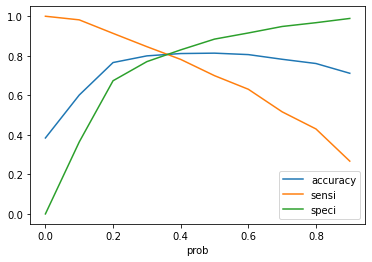

In [95]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**Note - The plot also shows that 0.4 is the appropriate values.**

### Create New Dataframe for Convrted probability using cutoff 0.4

In [96]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,0.176887,1,1,0,0,0,0,0,0,0,0,0
1,0,0.037753,1,0,0,0,0,0,0,0,0,0,0
2,0,0.049037,1,0,0,0,0,0,0,0,0,0,0
3,0,0.103771,1,1,0,0,0,0,0,0,0,0,0
4,0,0.108309,1,1,0,0,0,0,0,0,0,0,0


In [97]:
y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(10)

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted,lead_score
0,0,0.176887,1,1,0,0,0,0,0,0,0,0,0,18
1,0,0.037753,1,0,0,0,0,0,0,0,0,0,0,4
2,0,0.049037,1,0,0,0,0,0,0,0,0,0,0,5
3,0,0.103771,1,1,0,0,0,0,0,0,0,0,0,10
4,0,0.108309,1,1,0,0,0,0,0,0,0,0,0,11
5,1,0.515090,1,1,1,1,1,1,0,0,0,0,1,52
6,0,0.031186,1,0,0,0,0,0,0,0,0,0,0,3
7,0,0.033649,1,0,0,0,0,0,0,0,0,0,0,3
8,1,0.793846,1,1,1,1,1,1,1,1,0,0,1,79
9,0,0.278202,1,1,1,0,0,0,0,0,0,0,0,28


In [98]:
from sklearn import metrics

In [99]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3716  762]
 [ 610 2184]]


In [100]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8113311331133113


##### Let's now check the VIFs again

In [101]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values,i)for i in range (X_train[col].shape[1])]
vif['VIF']= round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Specialization_Select,2.20
3,Lead Source_Olark Chat,2.06
9,What is your current occupation_Not Provided,1.62
1,Lead Origin_Landing Page Submission,1.54
2,Lead Origin_Lead Add Form,1.49
6,Last Activity_Olark Chat Conversation,1.46
12,Last Notable Activity_SMS Sent,1.41
4,Lead Source_Welingak Website,1.32
0,Total Time Spent on Website,1.25
10,What is your current occupation_Working Profes...,1.19


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

## 9. Metrics beyond simply accuracy

In [103]:
#Calculating the 4 parameters
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7816750178954903

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.8298347476552033

In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1701652523447968


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.7413441955193483


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8589921405455386


### Plotting the ROC Curve

In [109]:
#Defining the draw_roc function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
#Calculating and saving values to fpr, tpr and thresholds
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

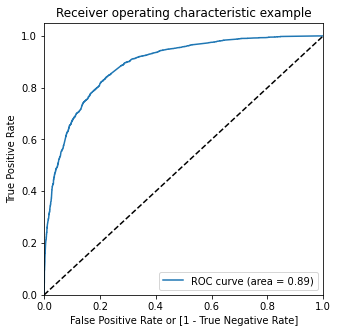

In [111]:
#Drawing the curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## 10. Precision and Recall

In [112]:
# Pricision TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7413441955193483

In [113]:
# Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7816750178954903

#### Using sklearn utilities for the same

In [114]:
#Importing precision_score, recall_score from sklearn.metrics
from sklearn.metrics import precision_score, recall_score

In [115]:
#Calculation using precision_score
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7413441955193483

In [116]:
#Calculation using recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7816750178954903

### Precision and recall tradeoff

In [117]:
#Importing precision_recall_curve from sklearn.metrics
from sklearn.metrics import precision_recall_curve

In [118]:
#Calculating the p,r, and threshold values using the precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

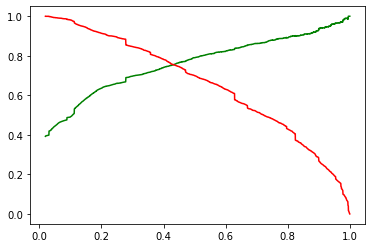

In [119]:
#Making the plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  11. Making predictions on the test set

In [120]:
#Using Scalar Trnsform on 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = Scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [121]:
#Using the selected columns to update the X_test dataframe
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Country_Saudi Arabia,Specialization_Select,What is your current occupation_Not Provided,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
3343,-0.881153,0,0,1,0,0,0,0,1,0,0,0,0,0
2600,-0.625765,1,0,0,0,0,0,0,0,0,1,0,0,0
3115,-0.147824,1,0,0,0,0,0,0,0,1,0,0,0,0
1348,-0.881153,0,0,1,0,0,1,0,1,1,0,0,0,0
4525,2.221815,1,0,0,0,0,0,0,0,0,0,0,1,0


In [122]:
#Creating the new dataframes for the model
X_test_sm = sm.add_constant(X_test)

In [123]:
y_test_pred = res.predict(X_test_sm)

In [124]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [125]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(Y_test)

In [126]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [127]:
y_pred_final.head()

,Converted,0
3343,1,0.278202
2600,1,0.567468
3115,0,0.074880
1348,0,0.031186
4525,1,0.935047


In [128]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [129]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [130]:
y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(10)

,Converted,Converted_Prob,final_predicted,lead_score
3343,1,0.278202,0,28
2600,1,0.567468,1,57
3115,0,0.074880,0,7
1348,0,0.031186,0,3
4525,1,0.935047,1,94
461,0,0.052770,0,5
1079,1,0.939143,1,94
7339,0,0.031186,0,3
6291,0,0.120845,0,12
1672,0,0.081303,0,8


In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.817931793179318

In [132]:
#Calculating and printing the Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[932, 185],
       [146, 555]], dtype=int64)

In [133]:
#Printing the four parameters
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7917261055634808

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.8343777976723367

In [136]:
# positive predictive value 
print (TP / float(TP+FP))

0.75


In [137]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8645640074211502


## Conclusion

- Accuracy, Sensitivity and Specificity values of test set are around 81%, 79% and 83% which are approximately closer to 
  the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.